# Capstone 2

-- Muchammad Fahd Ishamuddin

## DATA COLLECTION AND IMPORT

### Importing Library
- `Pandas` for reading datafram
- `Numpy` for array and mathematical thing
- `matplitlib` for visualize data
- `seaborn` visualize data more beauty

In [1]:
import pandas as pd #load for dataframe
import numpy as np #load for mathematical thing and numeration
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advance visualization

#### Open Dataset

Because We use CSV so should use `read_csv` to open file CSV

In [2]:
data = pd.read_csv('NYC_trip_record.csv')
data.head()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/877952477.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYC_trip_record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


DATA INFORMATION : 

- `VendorID` it means provider id (1 : Creative Mobile, 2 : Verifone Inc.)

- `Ipep_pickup_datetime` date n time when the meter engaged

- `Ipep_dropoff_datetime` date themeter disengaged.

- `Passengger_count` number of passengger

- `Trip_distance` The elapsed trip distance in miles was reported by the taximeter.

- `PULocationID` TLC Taxi Zone in which the taximeter was engaged

- `DOLocationID` TLC T axi Zone in which the taximeter was disengaged.

- `RateCodeID` The final rate code is in effect at the end of the trip. 1 = Standard rate 2 =JFK 3 =Newark 4 =Nassau or Westchester 5 =Negotiated fare 6 =Group ride

- `Store_and_fwd_flag` This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward, ” because the vehicle did not have a connection to the server. Y = store and forward trip N = not a store and forward trip

- `Payment_type` A numeric code signifying how the passenger paid for the trip. 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip

- `Fare_amount` The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- `MTA_tax` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- `Improvement_surcharge` $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

- `Tip_amount` This field is automatically populated for credit card tips. Cash tips are not included.

- `Tolls_amount` TThe total amount charged to passengers. Does not include cash tips.

- `Trip_type` A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. 1 = Street-hail 2 = Dispatch



## Initial Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [5]:
data.describe(include=object)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [7]:
data.RatecodeID.value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [8]:
data.payment_type.value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [9]:
data.trip_type.value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [10]:
data.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    63579
Y      308
Name: count, dtype: int64

In [11]:
data.trip_distance.value_counts()

trip_distance
0.00       3350
1.40        639
1.30        575
1.20        531
1.50        491
           ... 
18.00         1
35.36         1
15.54         1
16.77         1
4070.82       1
Name: count, Length: 1870, dtype: int64

In [12]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [13]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
numeric_df

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## Data Cleaning

### Cleaning

Like what we seen above, the `ehail_fee` column are null so we should drop that column

In [14]:
#because data in ehail_fee all
data = data.drop('ehail_fee',axis=1)

In [15]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [16]:
data.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

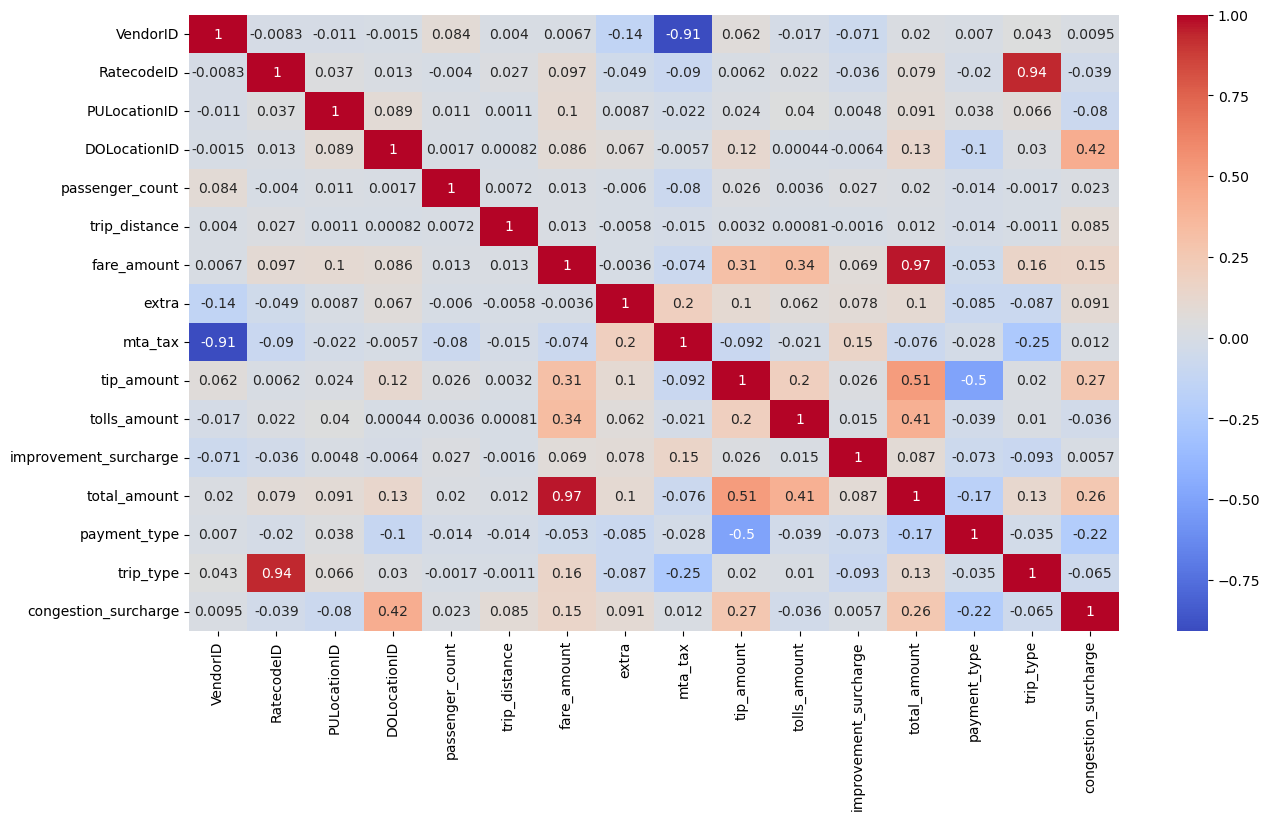

In [17]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [19]:
x = data[data['congestion_surcharge']==2.75]
x.RatecodeID.value_counts()

RatecodeID
1.0    16749
5.0      119
2.0        4
Name: count, dtype: int64

`store_and_fwd_flag`, `RatecodeID`, `payment_type` and `trip_type` is categorical data
`passenger_count` is numerical data

In [20]:
# Replace 99.0 and fill na with mode cause the RatecodeID column is categorical data
mode_rate = data['RatecodeID'].mode()[0]

data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
data['RatecodeID'].replace(99.0, mode_rate, inplace=True) #replace

data.RatecodeID.value_counts()


/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/2991276155.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/2991276155.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

RatecodeID
1.0    66437
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [21]:
#fill NA with Mode at store_and_fwd_flag column
mode_flag = data['store_and_fwd_flag'].mode()[0]
data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)

data.store_and_fwd_flag.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/1293544532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)


store_and_fwd_flag
N    67903
Y      308
Name: count, dtype: int64

In [22]:
mode_payment = data['payment_type'].mode()[0]
data['payment_type'].fillna(mode_payment, inplace=True)

data.payment_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/232235378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment_type'].fillna(mode_payment, inplace=True)


payment_type
1.0    45010
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [23]:
mode_trip = data['trip_type'].mode()[0]
data['trip_type'].fillna(mode_trip, inplace=True) #fillNA

data.trip_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/2562065600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trip_type'].fillna(mode_trip, inplace=True) #fillNA


trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

In [24]:
data.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

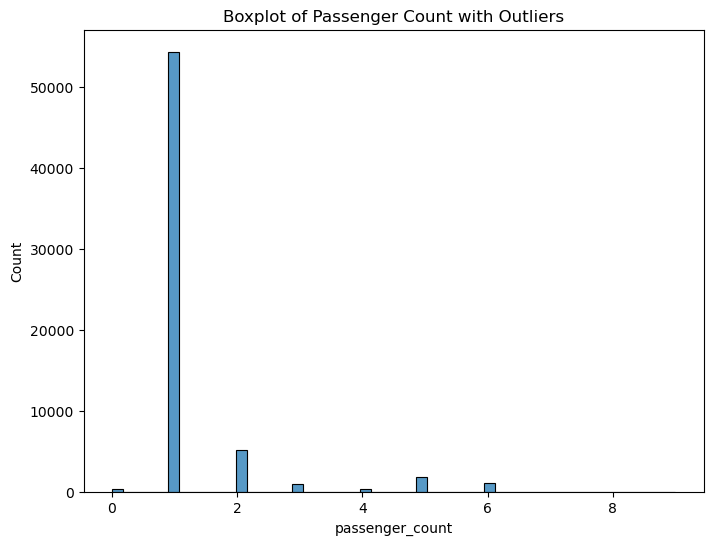

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='passenger_count',bins=50)
plt.title("Boxplot of Passenger Count with Outliers")
plt.show()

Cause Passenger Count are skew and a lot of outlier, it should be using median

In [26]:
median_pass = data['passenger_count'].median()
median_pass
data['passenger_count'].fillna(median_pass,inplace=True)
data['passenger_count'].replace(0.0, median_pass,inplace=True)
data['passenger_count'].replace(5.0, median_pass,inplace=True)
data['passenger_count'].replace(6.0, median_pass,inplace=True)
data['passenger_count'].replace(7.0, median_pass,inplace=True)
data['passenger_count'].replace(8.0, median_pass,inplace=True)
data['passenger_count'].replace(9.0, median_pass,inplace=True)
data.passenger_count.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/3429494908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(median_pass,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/3429494908.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

passenger_count
1.0    61793
2.0     5096
3.0      958
4.0      364
Name: count, dtype: int64

In [27]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [28]:
mode_congestion = data['congestion_surcharge'].mode()[0]
data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
data['congestion_surcharge'].replace(-2.75,mode_congestion,inplace=True)
data['congestion_surcharge'].replace(2.50,mode_congestion,inplace=True)
data.congestion_surcharge.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/2313100893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/2313100893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

congestion_surcharge
0.00    51339
2.75    16872
Name: count, dtype: int64

In [50]:
data[data['trip_distance']>=1000]
data.loc[data['trip_distance'] >= 1000, 'trip_distance'] = data['trip_distance'].apply(
    lambda x: f"{x/1000:.1f}" if x >= 1000 else x
)

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_10863/1904954512.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.6' '2.6' '3.1' '2.6' '2.4' '2.0' '1.1' '2.6' '4.0' '1.6' '2.4' '3.5'
 '1.8' '2.6' '4.4' '2.4' '4.5' '3.5' '2.0' '3.9' '4.0' '3.6' '1.5' '2.5'
 '3.3' '4.7' '2.4' '3.0' '4.1']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['trip_distance'] >= 1000, 'trip_distance'] = data['trip_distance'].apply(


In [51]:
data.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
month_pickup             0
day_pickup               0
hour_pickup              0
pickup_day               0
month_dropoff            0
day_dropoff              0
hour_dropoff             0
dropoff_day              0
trip_duration_minutes    0
dtype: int64

Data cleaned and not null there

In [31]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,1.863028,1.095366,98.549735,138.429901,1.118808,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.349929,1.020539,0.680213
std,0.343820,0.600965,61.244314,76.761311,0.405959,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.500030,0.141837,1.186557
min,1.000000,1.000000,1.000000,1.000000,1.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,4.000000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [52]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')

In [53]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

## Data Transformation

Cause my  purpose is try to make business analytic of NYC taxi, so i want separate data to be day, month, year and hour of each data

In [54]:

data['month_pickup'] = data['lpep_pickup_datetime'].dt.month
data['day_pickup'] = data['lpep_pickup_datetime'].dt.day
data['hour_pickup'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.dayofweek

In [55]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,month_dropoff,day_dropoff,hour_dropoff,dropoff_day,trip_duration_minutes
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,1,1,0,6,1,1,0,6,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,1,1,0,6,1,1,0,6,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.00,1,1,0,6,1,1,0,6,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,1,1,0,6,1,1,0,6,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,1,1,0,6,1,1,0,6,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4.10,15.70,...,0.00,1,31,22,1,1,31,22,1,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,1,31,22,1,1,31,22,1,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.00,1,31,23,1,2,1,0,2,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.00,1,31,23,1,1,31,23,1,18.000000


In [56]:

data['month_dropoff'] = data['lpep_dropoff_datetime'].dt.month
data['day_dropoff'] = data['lpep_dropoff_datetime'].dt.day
data['hour_dropoff'] = data['lpep_dropoff_datetime'].dt.hour
data['dropoff_day'] = data['lpep_dropoff_datetime'].dt.dayofweek

In [57]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,month_dropoff,day_dropoff,hour_dropoff,dropoff_day,trip_duration_minutes
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,1,1,0,6,1,1,0,6,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,1,1,0,6,1,1,0,6,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.00,1,1,0,6,1,1,0,6,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,1,1,0,6,1,1,0,6,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,1,1,0,6,1,1,0,6,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4.10,15.70,...,0.00,1,31,22,1,1,31,22,1,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,1,31,22,1,1,31,22,1,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.00,1,31,23,1,2,1,0,2,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.00,1,31,23,1,1,31,23,1,18.000000


In [58]:
# data['trip_duration_hours'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 3600

In [59]:
data['trip_duration_minutes'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60

`trip_duration_minutes` have a purpose to know duration betwwen the trip

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [68]:
data[data['store_and_fwd_flag']=='Y']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,month_dropoff,day_dropoff,hour_dropoff,dropoff_day,trip_duration_minutes
1429,1,2023-01-02 08:21:14,2023-01-02 08:27:25,Y,1.0,74,263,1.0,2.1,10.7,...,2.75,1,2,8,0,1,2,8,0,6.183333
1479,1,2023-01-02 09:20:49,2023-01-02 09:27:42,Y,1.0,74,41,1.0,1.4,7.5,...,0.00,1,2,9,0,1,2,9,0,6.883333
1570,1,2023-01-02 10:18:45,2023-01-02 10:43:05,Y,1.0,152,18,1.0,7.7,33.1,...,0.00,1,2,10,0,1,2,10,0,24.333333
1679,1,2023-01-02 12:47:37,2023-01-02 13:15:51,Y,1.0,244,75,1.0,4.9,22.0,...,0.00,1,2,12,0,1,2,13,0,28.233333
1937,1,2023-01-02 14:12:59,2023-01-02 15:07:05,Y,1.0,21,95,1.0,0.0,55.5,...,0.00,1,2,14,0,1,2,15,0,54.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62265,1,2023-01-31 10:19:34,2023-01-31 10:36:22,Y,1.0,75,232,1.0,6.5,28.2,...,2.75,1,31,10,1,1,31,10,1,16.800000
62471,1,2023-01-31 12:15:27,2023-01-31 12:22:53,Y,1.0,74,41,1.0,1.0,8.6,...,0.00,1,31,12,1,1,31,12,1,7.433333
62557,1,2023-01-31 13:50:21,2023-01-31 14:14:23,Y,1.0,244,163,1.0,6.8,31.7,...,2.75,1,31,13,1,1,31,14,1,24.033333
62714,1,2023-01-31 14:59:50,2023-01-31 15:14:04,Y,1.0,74,166,1.0,1.5,13.5,...,0.00,1,31,14,1,1,31,15,1,14.233333


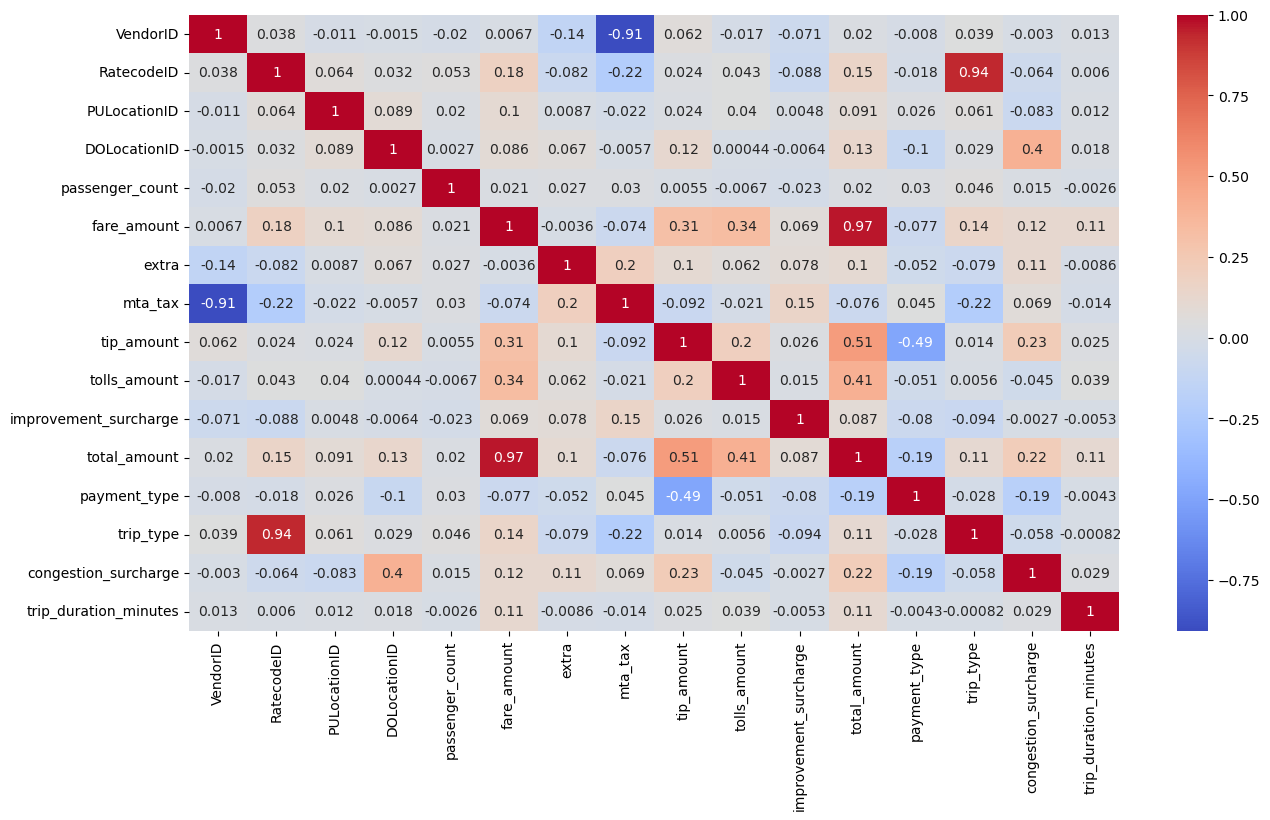

In [ ]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

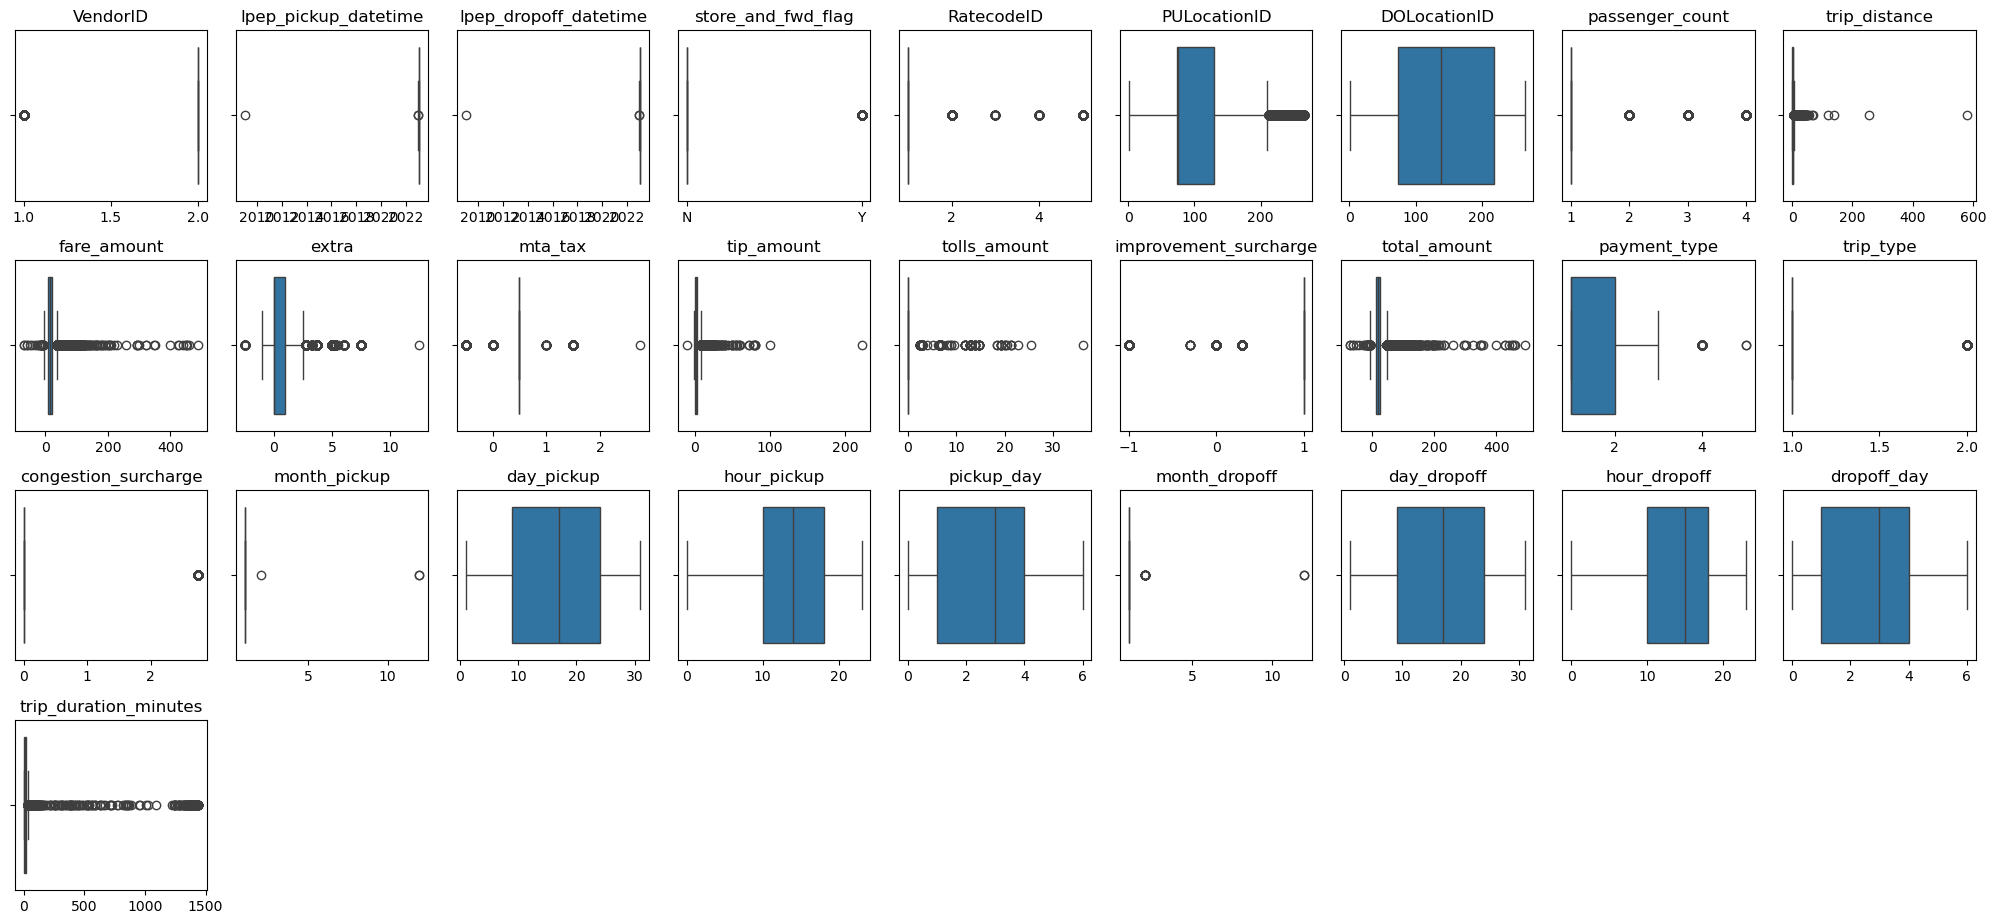

In [62]:
rows, cols = 7, 9
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [65]:
len(data)

68211

In [63]:
data.trip_distance.value_counts(sort=False)

trip_distance
2.58      107
1.81      170
0.00     3350
1.30      575
1.10      469
         ... 
12.23       1
20.29       1
18.22       1
13.17       1
18.62       1
Name: count, Length: 1840, dtype: int64

In [64]:
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = data[(data['trip_distance'] < (Q1 - 1.5 * IQR)) | (data['trip_distance'] > (Q3 + 1.5 * IQR))]

# Print outliers
print("Outliers:\n", outliers)
len(outliers)

Outliers:
        VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
12            2  2023-01-01 00:26:32   2023-01-01 00:45:31                  N   
15            1  2023-01-01 00:49:34   2023-01-01 01:08:23                  N   
17            2  2023-01-01 00:35:11   2023-01-01 01:17:35                  N   
31            2  2023-01-01 00:46:48   2023-01-01 01:08:17                  N   
32            2  2023-01-01 00:40:58   2023-01-01 01:04:32                  N   
...         ...                  ...                   ...                ...   
68182         2  2023-01-31 17:34:00   2023-01-31 18:32:00                  N   
68187         2  2023-01-31 18:35:00   2023-01-31 19:08:00                  N   
68195         2  2023-01-31 19:52:00   2023-01-31 20:24:00                  N   
68199         2  2023-01-31 19:17:00   2023-01-31 20:00:00                  N   
68201         2  2023-01-31 20:57:00   2023-01-31 21:17:00                  N   

       RatecodeI

5745

## Exploratory Data Analysis

## Statistical Analysis

In [ ]:
from scipy import stats #for stats

## Export Result